### Explore [SocialSecurityNamesAllYears](https://github.com/benkaan001/pandas_and_beyond/blob/main/generate_data/02_create_dataset_with_wget.ipynb) dataset created earlier using `wget` and `zipfile` libraries.

- 1. Explore matplotlib `styles` and `colors`.
- 2. Create a df using `read_csv` method.
- 3. Explore and plot unique naming trends between 1880 and 2021.
- 4. Run queries to observe the trends for a given name.
- 5. Visualize query results for both genders using `Subplot`.
- 6. Create a `function` to visualize query results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1. Explore matplotlib `styles` and `colors`.

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# set style
plt.style.use('fivethirtyeight')

- [link](https://matplotlib.org/stable/gallery/color/named_colors.html) for visual color map of available built-in color pallete.

In [4]:
# import to explore available colors
import matplotlib.colors as mcolors 
mcolors.CSS4_COLORS 

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

## 2. Create a df using `read_csv` method.


In [5]:
df = pd.read_csv('../generate_data/data/cleaned/SocialSecurityNamesAllYears.csv')

df.shape

(2052781, 4)

In [6]:
df.columns

Index(['Name', 'Sex', 'Count', 'Year'], dtype='object')

In [7]:
df.dtypes

Name     object
Sex      object
Count     int64
Year      int64
dtype: object

## 3. Explore and plot unique naming trends between 1880 and 2021.


In [8]:
# check total number of unique names registered in each year
df['Year'].value_counts()

2008    35088
2007    34965
2009    34722
2006    34097
2010    34089
        ...  
1885     2294
1882     2127
1883     2084
1880     2000
1881     1934
Name: Year, Length: 142, dtype: int64

In [9]:
# sort the unique names by ascending year order
df['Year'].value_counts().sort_index()

1880     2000
1881     1934
1882     2127
1883     2084
1884     2297
        ...  
2017    32648
2018    32196
2019    32073
2020    31453
2021    31537
Name: Year, Length: 142, dtype: int64

- Plot the `unique name count` per year.

<AxesSubplot:>

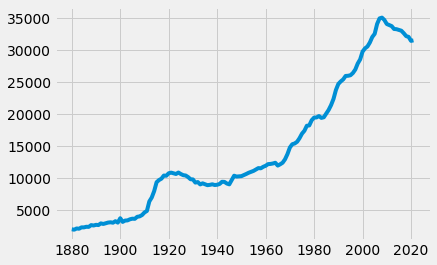

In [10]:
df['Year'].value_counts() \
        .sort_index() \
        .plot()


- Add `title` and `labels`, and adjsut `line width`.

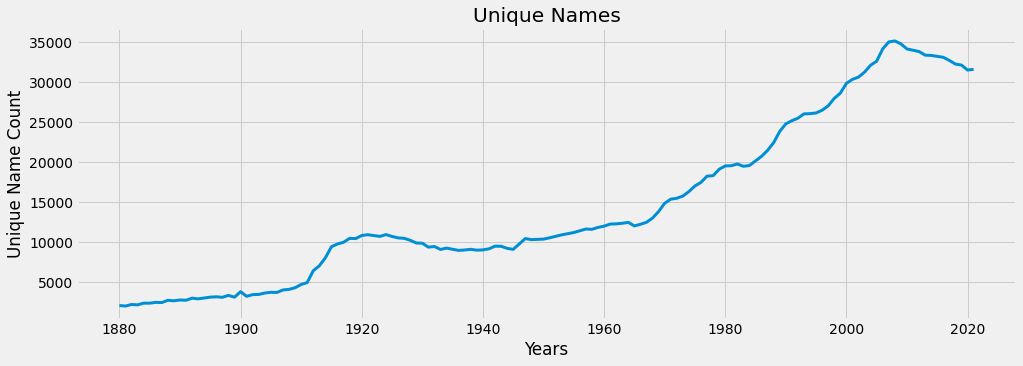

In [11]:
ax = df['Year'].value_counts() \
        .sort_index() \
        .plot(figsize=(15,5), 
                title='Unique Names', 
                lw=3)

ax.set_xlabel('Years')
ax.set_ylabel('Unique Name Count')

plt.show()

## 4. Run and plot queries to observe the trends for a given name.


In [12]:
df.query('Name == "Ben" and Sex == "F"').head(5)

,Name,Sex,Count,Year
67454,Ben,F,5,1938
78391,Ben,F,6,1904
85912,Ben,F,7,1911
91959,Ben,F,8,1939
231798,Ben,F,6,1913


- `Set index` to 'Year' and Sort results by 'Count' total in descending order.

In [13]:
df.query(' Name == "Ben" and Sex == "F" ')\
    .set_index('Year') \
    .sort_values('Count', ascending=False) \
    .head(10)

,Name,Sex,Count
Year,,,
1917,Ben,F,20
1925,Ben,F,17
1918,Ben,F,17
1927,Ben,F,16
1920,Ben,F,16
1928,Ben,F,15
1916,Ben,F,15
1919,Ben,F,14
1924,Ben,F,14


- Calculate the `percentage` of name usage in a given year. 

In [14]:
name = 'Irma'
sex = 'F'
year = 2021

# total count in a given year
total_count = df.query('Year == @year and Sex == @sex')['Count'].sum()

# name count in a given year
name_count = df.query('Name == @name and Year == @year')['Count'].sum()

# round up to find the count in million
ratio = round( name_count/total_count * 1_000_000 )

sex = "Female" if sex == 'F' else "Male"

print(f"Every {ratio} out of 1 million children registered as {sex} were named {name} in {year}. ")


Every 37 out of 1 million children registered as Female were named Irma in 2021. 


In [15]:
# wrap the above logic in a function
def find_name_popularity_ratio(name, sex, year):

    # total count in a given year
    total_count = df.query('Year == @year and Sex == @sex')['Count'].sum()

    # name count in a given year
    name_count = df.query('Name == @name and Year == @year')['Count'].sum()

    # round up to find the count in million
    ratio = round( name_count/total_count * 1_000_000 )

    sex = "Female" if sex == 'F' else "Male"

    return print(f"Every {ratio} out of 1 million children registered as {sex} were named {name} in {year}. ")

find_name_popularity_ratio('Ben', 'M', 1985)


Every 230 out of 1 million children registered as Male were named Ben in 1985. 


## 5. Visualize query results for both genders using `Subplot`.

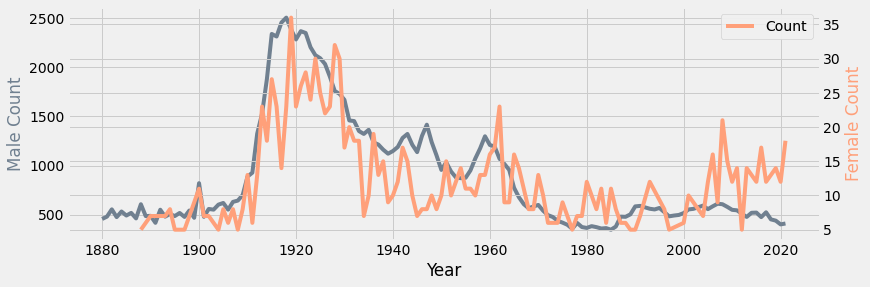

In [16]:
name = 'Sam'
fig, ax1 = plt.subplots(figsize=(12, 4))

df.query('Name == @name and Sex == "M"') \
        .set_index('Year')\
        .sort_index()\
        .plot(figsize=(12, 4), ax=ax1, color='slategray')

ax2 = ax1.twinx()

df.query('Name == @name and Sex == "F"')\
        .set_index('Year')\
        .sort_index() \
        .plot(figsize=(12, 4), ax=ax2, color='lightsalmon')

# set labels
ax1.set_ylabel('Male Count')
ax2.set_ylabel('Female Count')

# change yaxis label colors
ax1.yaxis.label.set_color('slategray')
ax2.yaxis.label.set_color('lightsalmon')

plt.show()

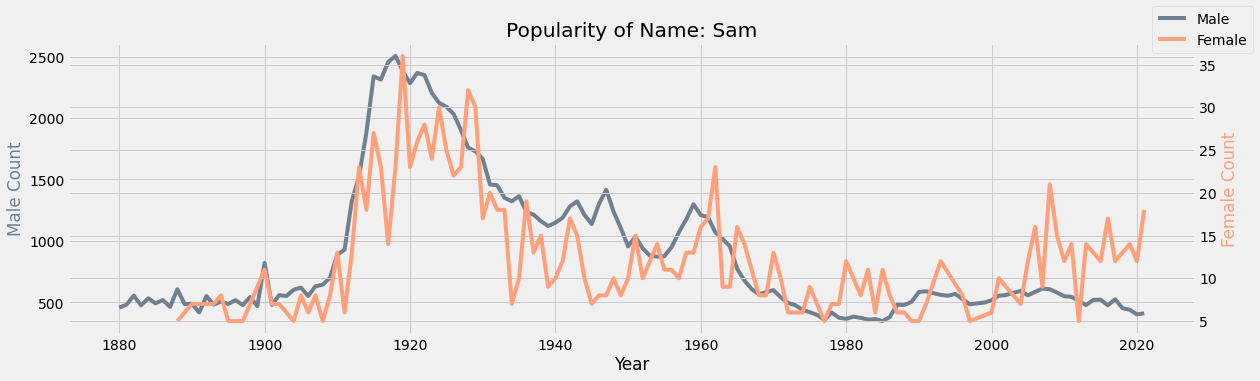

In [17]:
name = 'Sam'
figsize =(18, 5)

fig, ax1 = plt.subplots(figsize=figsize)

df.query('Name == @name and Sex == "M"') \
        .set_index('Year')\
        .sort_index()\
        .plot(figsize=figsize, ax=ax1, color='slategray')

ax2 = ax1.twinx()

df.query('Name == @name and Sex == "F"')\
        .set_index('Year')\
        .sort_index() \
        .plot(figsize=figsize, ax=ax2, color='lightsalmon')

#set title
ax1.set_title(f"Popularity of Name: {name}")

# set y label
ax1.set_ylabel('Male Count')
ax2.set_ylabel('Female Count')

# change yaxis label colors
ax1.yaxis.label.set_color('slategray')
ax2.yaxis.label.set_color('lightsalmon')

# remove legend
ax1.legend().remove()
ax2.legend().remove()

# set figure legend
fig.legend(['Male', 'Female'])

plt.show()

## 6. Create a `function` to visualize query results.

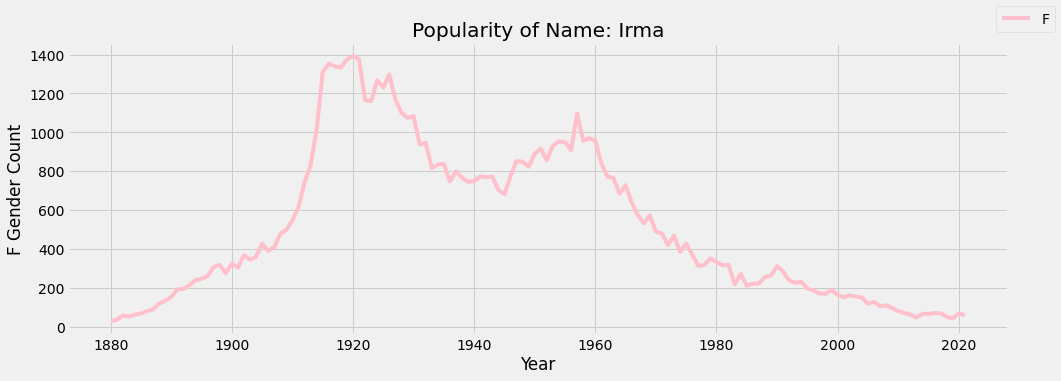

In [18]:
def plot_name_popularity(df, name, sex=['M', 'F']):
    
    fig, ax1 = plt.subplots(figsize=(15, 5))

    df.query('Name == @name and Sex == @sex[0]') \
        .set_index('Year') \
        .sort_index() \
        .plot(figsize=(15,5),
            ax = ax1,
            # change the default to pink if only 'F' gender is requested for comparison
            color = 'pink' if sex[0] == 'F' else 'dodgerblue')
    
    # set title 
    ax1.set_title(f"Popularity of Name: {name}")

    # set y label
    ax1.set_ylabel(f"{sex[0]} Gender Count")

    # remove legend
    ax1.legend().remove()

    # create a subplot if both gender are passed for the sex arg
    if len(sex) == 2:
        ax2 = ax1.twinx()

        df.query('Name == @name and Sex == @sex[1]') \
            .set_index('Year') \
            .sort_index() \
            .plot(figsize=(15, 5),
                ax = ax2,
                color = 'pink')
        
        # remove legend from ax2
        ax2.legend().remove()

        # set y label
        ax2.set_ylabel(f'{sex[1]} Gender Count')

        # change yaxis label colors to match the subplots
        ax1.yaxis.label.set_color('dodgerblue')
        ax2.yaxis.label.set_color('pink')

    # set figure legend
    fig.legend(sex)

    return plt.show()

plot_name_popularity(df, 'Irma', sex=['F'])

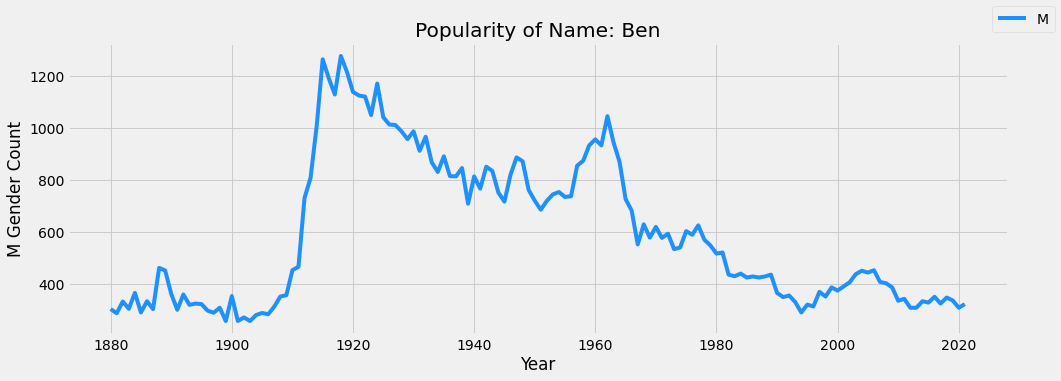

In [19]:
plot_name_popularity(df, 'Ben', sex=['M'])

- Plot the popularity of a name after a `certain year`.

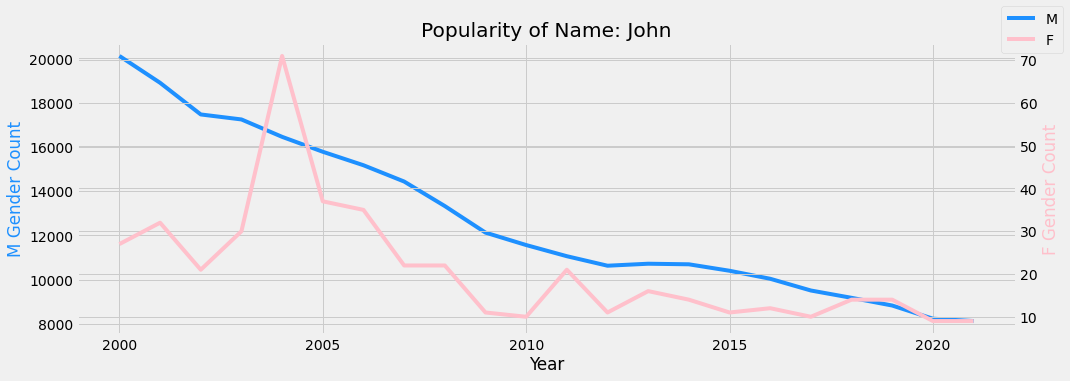

In [20]:
plot_name_popularity(df.query('Year >= 2000'), 'John')

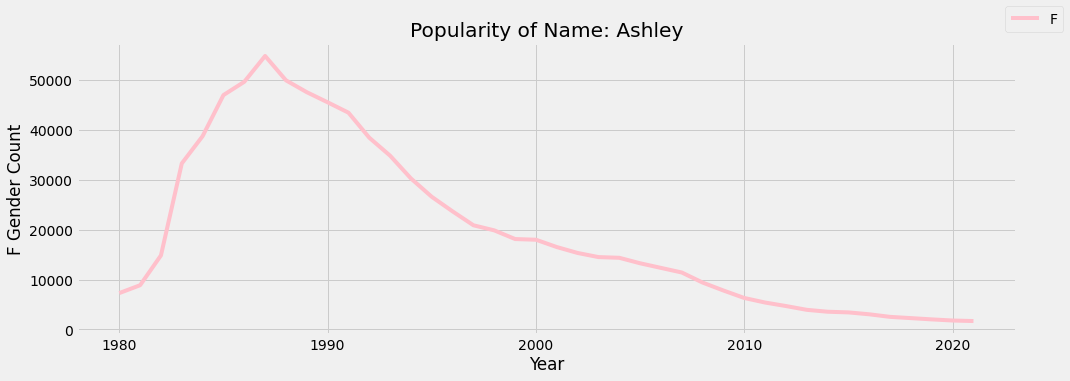

In [21]:
plot_name_popularity(df.query('Year >= 1980'), 'Ashley', sex=['F'])

# <center> THE END </center>